# Лабораторная работа 1.2. Линейная регрессия

Библиотеки

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn import datasets

Загрузка данных

In [50]:
diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['progression'] = diabetes.target

Первые 5 строк

In [51]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Здесь единственный очевидный категориальный признак - это sex, целевой - progression, а остальные все - вещественные признаки (сложно сказать насчёт s4, является ли он категориальным или нет)

In [52]:
categorial_features = ['sex']
real_features = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target_feature = ['progression']

Делим данные на обучающие и тестовые

In [53]:
train, test = train_test_split(data, test_size=0.2)

График

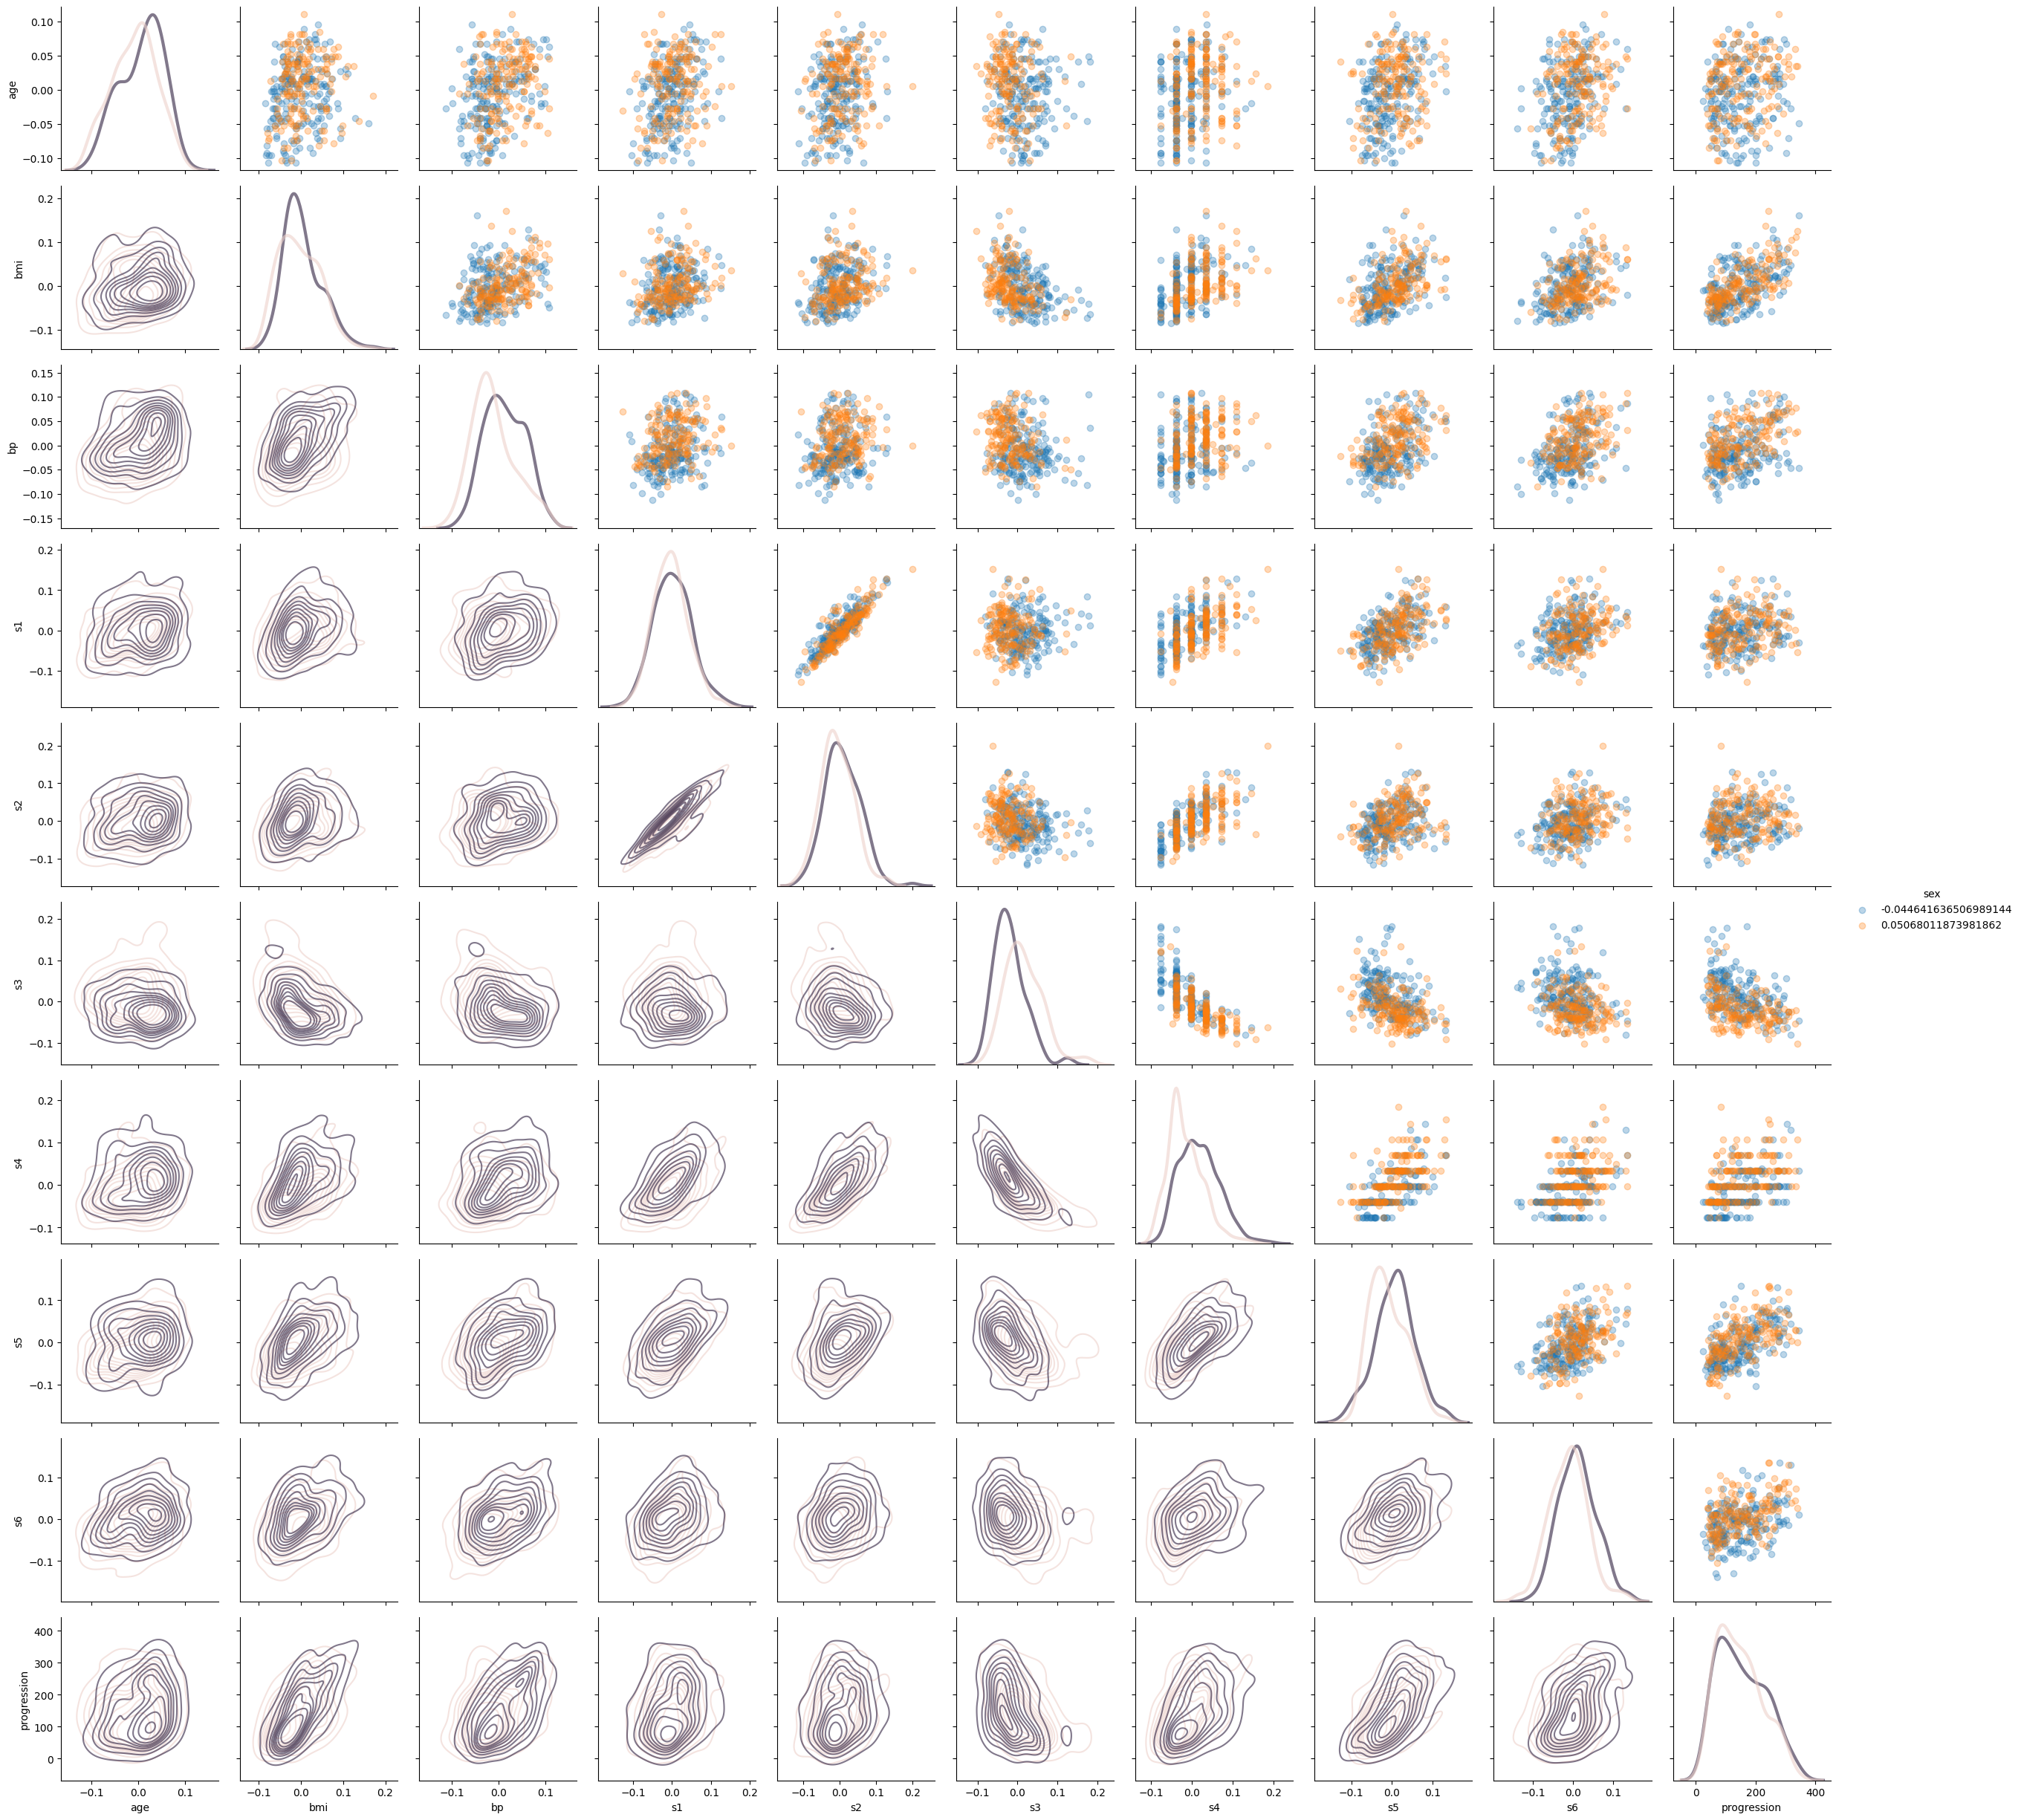

In [54]:
graph = sns.PairGrid(train, hue='sex', diag_sharey=False)
graph.map_lower(sns.kdeplot, alpha=0.6)
graph.map_upper(plt.scatter, alpha=0.3)
graph.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
graph.add_legend()
plt.show()

По графику заметно, что:

1. Между s1 и s2 есть большая зависимость
2. Значение progression растёт с увеличением bmi, а также с bp, s5 и s6, но слабее

Как я понял формулировку задания, нужно выбрать из всех вещественных признаков тот, от которого признак progression больше всего зависит, и затем по этому признаку построить регрессионную прямую. Иначе же пришлось бы строить регрессионную прямую для каждого из признаков

Исходя из этого, я выбрал признак bmi

Создаём модель линейной регресии. Сначала сделаем это, используя встроенную в Scikit-Learn

In [55]:
X_train = train[['bmi']]
Y_train = train[target_feature]

model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

print("Свободный коэффициент =", model.intercept_)
print("Коэффициент перед признаком =", model.coef_)

Свободный коэффициент = [151.0334301]
Коэффициент перед признаком = [[950.65150165]]


Теперь выполняем предсказание на test

In [56]:
X_test = test[['bmi']]
Y_pred = model.predict(X_test)

Рисуем график

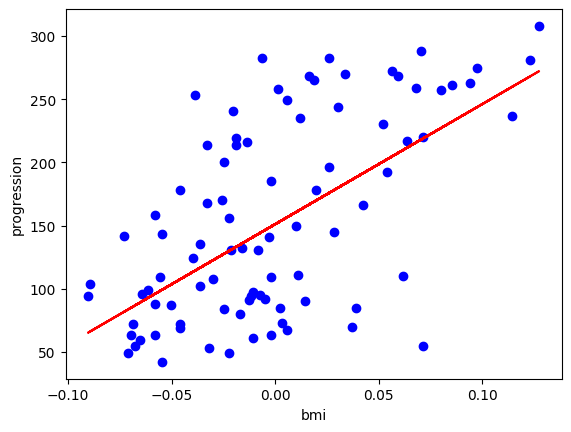

In [57]:
Y_test = test[target_feature]

plt.scatter(X_test, Y_test, color="b")
plt.plot(X_test, Y_pred, color="r")
plt.xlabel("bmi")
plt.ylabel("progression")
plt.show()

Теперь моя реализация

In [58]:
def coef(X_train, Y_train):  # нахождение коэффициентов регрессионной прямой
    sum_x, sum_y, sum_xy, sum_x2 = 0, 0, 0, 0
    
    x = [x for x in np.nditer(X_train)]
    y = [y for y in np.nditer(Y_train)]
    
    N = len(y)

    for i in range(N):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i]*y[i]
        sum_x2 += x[i]**2

    b = (sum_xy - sum_x*sum_y/N)/(sum_x2 - sum_x**2/N)
    a = (sum_y - b*sum_x)/N

    return (a, b)


def f(x, a, b):
    return a + b*x

In [59]:
a, b = coef(X_train, Y_train)

print("Свободный коэффициент =", a)
print("Коэффициент перед признаком =", b)

Свободный коэффициент = 151.0334300970088
Коэффициент перед признаком = 950.6515016463547


График

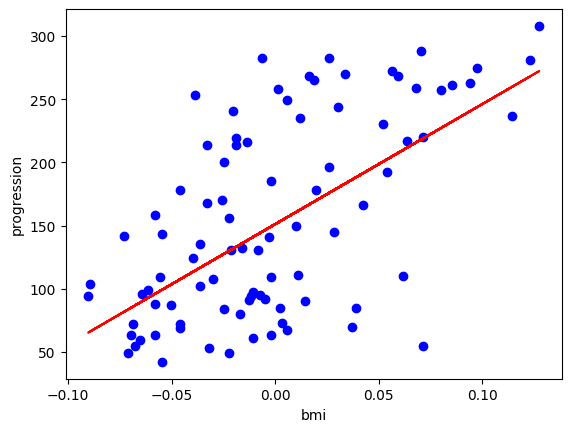

In [60]:
plt.scatter(X_test, Y_test, color="b")
plt.plot(X_test, f(X_test, a, b), color="r")
plt.xlabel("bmi")
plt.ylabel("progression")
plt.show()

Результаты предсказаний

In [61]:
print(Y_pred)

[[143.08448315]
 [217.8820108 ]
 [ 99.02566548]
 [202.5126558 ]
 [259.89158113]
 [148.20760148]
 [ 66.23770816]
 [232.22674213]
 [119.51813882]
 [ 95.95179449]
 [177.92168781]
 [156.40459081]
 [188.16792447]
 [218.90663447]
 [ 81.60706315]
 [153.33071981]
 [175.87244047]
 [ 84.68093415]
 [ 83.65631049]
 [179.97093514]
 [166.65082748]
 [135.91211748]
 [243.49760247]
 [129.76437548]
 [116.44426782]
 [200.46340847]
 [137.96136481]
 [145.13373048]
 [149.23222514]
 [152.30609614]
 [ 89.80405249]
 [161.52770914]
 [156.40459081]
 [162.55233281]
 [119.51813882]
 [127.71512815]
 [ 88.77942882]
 [183.04480614]
 [138.98598848]
 [240.42373147]
 [130.78899915]
 [114.39502048]
 [ 86.73018149]
 [ 98.00104182]
 [107.22265482]
 [168.70007481]
 [149.23222514]
 [146.15835415]
 [160.50308548]
 [132.83824648]
 [131.81362281]
 [107.22265482]
 [103.12416015]
 [134.88749381]
 [186.11867714]
 [141.03523581]
 [154.35534348]
 [122.59200982]
 [127.71512815]
 [211.7342688 ]
 [107.22265482]
 [ 99.02566548]
 [ 92.87